# Enhancing Fake News Detection with Hybrid Deep Learning: A Comparison of BERT and LSTM with Feature Engineering


## Motivation and Objectives

Nowadays, it is increasingly common for websites and social media users to produce fake news in order to attract greater engagement. Such content tends to spread more rapidly than factual news because it is often sensational in nature and deliberately crafted to provoke strong emotional reactions.

This kind of fake news can radicalize readers toward extremist ideologies or harmful lifestyles by spreading information that is not factual and often far removed from reality, even when scientific evidence clearly demonstrates the opposite. For example, the claim that raw milk is the healthiest option.

For this reason, it is vital to detect a fake new as soon as possible, so it can be labelled as misinformation and even removed if the information is factual. Using algorithms it is possible to detect them rapidly and with a high accuracy.

For this reason, it is vital to identify fake news as quickly as possible so that it can be labeled as misionformation or even remove when proven harmful. With the use of algorithms, such content can be detected and with a high degree of accuracy.

This project aims to compare the performance of BERTH with a hybrid model that combines word embeddings, an LSTM networds, and engineered variables for the task of fake news detection. The objective is to evaluate whether integrating deep learning with additional handcrafted features can outperform a purely transformer-based approach in terms of accuracy and precision.

The contribution of this study lies in the introduction of numeric variables derived both the titles and the full text of news articles, designed to capture linguistic, structural, and stylistic patterns often overlooked by existing models. These variable include measures such as readability, word counts sentiment polarity and average word length in both titles and text. By integrating these feature with deep learning architectures, the study seeks to enrich the model's reprentation of news content and enchance its ability to distinguish between acthentic and fabricated information.

## Models Theory

BERT, whose full name is Bidirectional Encoder Representations from Transformers, is a language model created by Google in 2018.
To understand BERT, it is important to first explain what a Transformer is. A Transformer is the underlying architecture of the model. It is specialized in handling sequences of data, such as text. For each sequence, it uses self-attention, a mechanism that determines the importance (or weight) of each token in a sentence.
BERT stands out because it reads bidirectionally, unlike earlier models that read only left-to-right or right-to-left. This means that for each token, BERT looks at the tokens that appear both before and after it, providing richer context and greater accuracy.
Transformers consist of two main parts: encoders and decoders. BERT uses only the encoder, which makes it excellent at understanding text but not originally designed for generating it.
BERT builds its input representations from three types of embeddings:
•	Token embeddings: the meaning of the word itself.
•	Segment embeddings: which sentence the token belongs to (A or B).
•	Position embeddings: the position of the token in the sentence.

The model is pretrained with two objectives: Masked Language Modeling (MLM), which hides some words and makes BERT predict them, and Next Sentence Prediction (NSP), which gives BERT two sentences and asks whether the second one follows the first.


Another solution to detect fake news is to work with neural networks, especially LSTM (Long Short-Term Memory). A neural network is a collection of many layers made up of neurons. A neuron is a small function: it multiplies inputs by weights, adds them up, and then passes them through an activation function.
An LSTM is designed to handle sequences, and it is usually better than plain neural networks because it can remember information from earlier words. It is able to do this thanks to a cell state that carries long- and short-term memory, and input gates that decide what new information to store for the next layer. It also has forget gates that decide what old information to erase.
It is possible to add numeric variables to a neural network using small feed-forward layers, which produce numeric representation vectors. After that, it is important to concatenate the text vectors with the numeric vectors into one long vector.


## Methodology


It is crucial to analyse the data for potential errors in order to clean it and produce more reliable results.
The first step involves examining whether missing values occur randomly. A significant imbalance between the fake/ factual news associated with missing values and those without suggests that the missingness in likely not random.

Next, duplicate entries are identified and removed to ensure that the dataset accurately represents the underlying population.

After that, there is valuable in the variables text and title that it will be used in the experiment as new variables if this information varies bettween the fake/factual news. This analysed information will be the number of words, the average length of character in a word and how sentimental and readable are the sentences.

The text and title variables contain valuable information that can be utilized as new features in the experiment, particularly if they differ between fake and factual news. The extrated features include the number of words, the average word length, and the sentiment and readability of the sentences.

To reduce computational cost, the Tiny BERT model is used, offering a significantly smaller architecture compared to the base BERT. The text and title variables are combined and tokenized with a maximum sequence length of 64 tokens. Both training and evaluation are performed with a batch size of 32 over three epochs.

The next two models are multi-input neural networks for binary classification that work with sequences from the text and title variables. The main difference is that the second model also includes numeric features created during preprocessing. These models will be compared to see if adding numeric variables improves prediction.

In both models, each input goes through a 100-dimensional embedding layer and an LSTM layer—128 units for the text and 64 for the title. The outputs of the LSTM layers are combined, then passed through a dropout layer with a rate of 0.5 to prevent overfitting, followed by a dense layer with 64 neurons and ReLU activation. The final output is a single sigmoid neuron that gives a probability for binary classification. Both models use the Adam optimizer and binary cross-entropy loss, with accuracy as the metric.

In the numeric model, the numeric inputs are first standardized with StandardScaler, which normalizes each feature by removing the mean and scaling to unit variance. These numeric features are processed in parallel through a dense layer with 32 neurons and ReLU activation, letting the network learn patterns from the numeric data before combining it with the text representations.


In [2]:
import kagglehub
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt_tab')
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import tiktoken
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import torch
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from textblob import TextBlob
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
!pip install textstat
import textstat
import shap



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.2 MB/s eta 0:00:00


In [ ]:
path = kagglehub.dataset_download("saurabhshahane/fake-news-classification")

print("Path to dataset files:", path)

100%|██████████| 92.1M/92.1M [00:02<00:00, 34.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/saurabhshahane/fake-news-classification/versions/77


In [ ]:
files = os.listdir(path)
print("Files in dataset:", files)

Files in dataset: ['WELFake_Dataset.csv']


In [ ]:
dataset_path = os.path.join(path, "WELFake_Dataset.csv")
df = pd.read_csv(dataset_path, encoding="utf-8")
print(df)

       Unnamed: 0                                              title  \
0               0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1               1                                                NaN   
2               2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3               3  Bobby Jindal, raised Hindu, uses story of Chri...   
4               4  SATAN 2: Russia unvelis an image of its terrif...   
...           ...                                                ...   
72129       72129  Russians steal research on Trump in hack of U....   
72130       72130   WATCH: Giuliani Demands That Democrats Apolog...   
72131       72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132       72132  Trump tussle gives unpopular Mexican leader mu...   
72133       72133  Goldman Sachs Endorses Hillary Clinton For Pre...   

                                                    text  label  
0      No comment is expected from Barack Obama Membe...      1  
1  

In [ ]:
print(df.isna().sum())

specific_columns = ['title', 'text']
na_title = df[df["title"].isna()]
na_text = df[df["text"].isna()]
print(na_title)
print(na_text)

print("Proportion of NA in the column title which are fake news" ,sum(na_title["label"])/len(na_title["label"]))
print("Proportion of NA in the column text which are fake news",sum(na_text["label"])/len(na_text["label"]))



Unnamed: 0      0
title         558
text           39
label           0
dtype: int64
       Unnamed: 0 title                                               text  \
1               1   NaN     Did they post their votes for Hillary already?   
43             43   NaN  True. Hillary needs a distraction and what bet...   
162           162   NaN  All eyes on Electoral delegates. The People kn...   
185           185   NaN                                               Cool   
269           269   NaN  A leading US senator: US Supporting War in Syr...   
...           ...   ...                                                ...   
71484       71484   NaN  Another Arab supremacist masturbation fantasy....   
71521       71521   NaN  I'm sure they drastically changed accounting m...   
71540       71540   NaN  It's easy to imagine Obama or Kerry pissing hi...   
71570       71570   NaN  Ever since the powers to be assassinated JFK A...   
71734       71734   NaN             Hmm, free college, no

It was observed that all news articles with an “NA” value in either the title or the text are always labeled as fake. This suggests that the missing values are not random. Therefore, they should be removed to create a cleaner and more representative dataset.

In [ ]:
df_cleaned = df.dropna()


In [ ]:

print("Title duplicates:", df_cleaned['title'].duplicated().sum())

print("Text duplicates:", df_cleaned['text'].duplicated().sum())

dup_texts = df[df['text'].duplicated(keep=False)].sort_values('text')
print(dup_texts.head(10))



Title duplicates: 9229
Text duplicates: 9337
       Unnamed: 0                                              title  \
28733       28733  Hillary Is 70 Days Away From Controlling All F...   
33501       33501  Hillary Is 70 Days Away From Controlling All F...   
16419       16419  Just Another Day In the Life of the Clinton Cr...   
24633       24633  Just Another Day In the Life of the Clinton Cr...   
12670       12670  14 Days to Do 14 Things, If You Want to Surviv...   
1276         1276  14 Days to Do 14 Things, If Hillary’s Indicted...   
20004       20004  14 Days to Do 14 Things, If Hillary’s Indicted...   
24596       24596  CNN Fired Donna Brazile 2 Weeks Ago, Made It P...   
28343       28343  CNN Fired Donna Brazile 2 Weeks Ago, Made It P...   
23436       23436  Project Veritas Video 4 - 20K Bribery to DNC, ...   

                                                    text  label  
28733  \n\n \nIf Clinton is elected, Obama will hand ...      1  
33501  \n\n \nIf Clinton is el

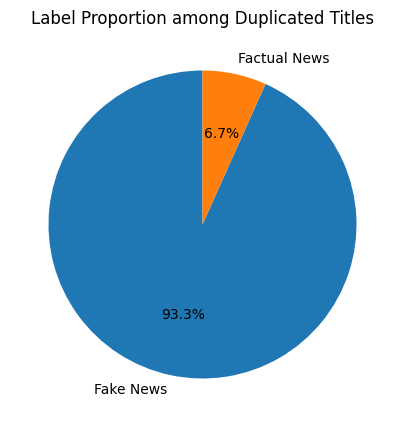

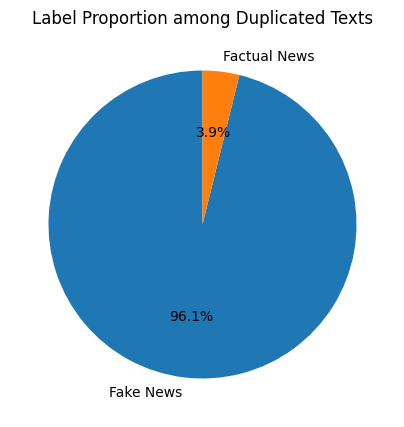

In [ ]:
dup_titles = df_cleaned[df_cleaned['title'].duplicated(keep=False)]
title_prop = dup_titles['label'].value_counts(normalize=True)

title_labels = ['Factual News' if x == 0 else 'Fake News' for x in title_prop.index]


plt.figure(figsize=(5,5))
plt.pie(title_prop, labels=title_labels, autopct="%.1f%%", startangle=90)
plt.title("Label Proportion among Duplicated Titles")
plt.show()

dup_texts = df_cleaned[df_cleaned['text'].duplicated(keep=False)]
text_prop = dup_texts['label'].value_counts(normalize=True)

text_labels = ['Factual News' if x == 0 else 'Fake News' for x in text_prop.index]

plt.figure(figsize=(5,5))
plt.pie(text_prop, labels=text_labels, autopct="%.1f%%", startangle=90)
plt.title("Label Proportion among Duplicated Texts")
plt.show()



A considerable portion of the working dataset is duplicated. Upon analyzing these duplicates, a strong imbalance

In [ ]:
df_cleaned = df_cleaned.drop_duplicates(subset=["text","title"])

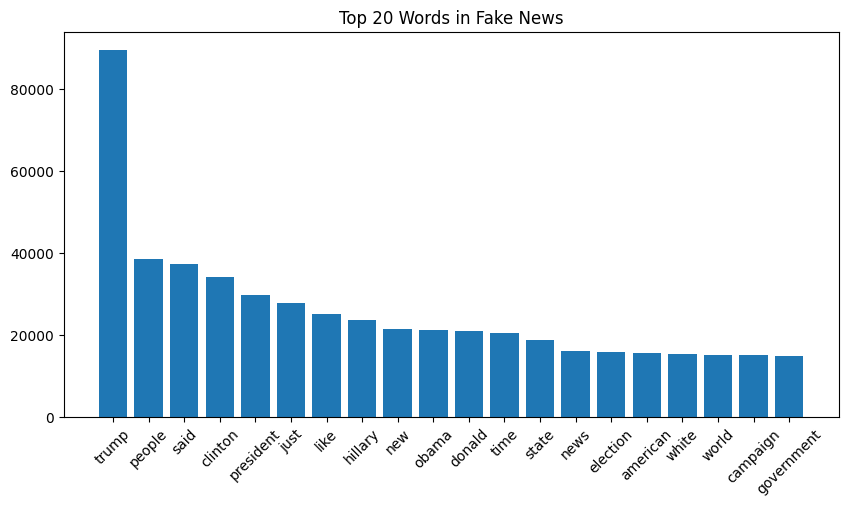

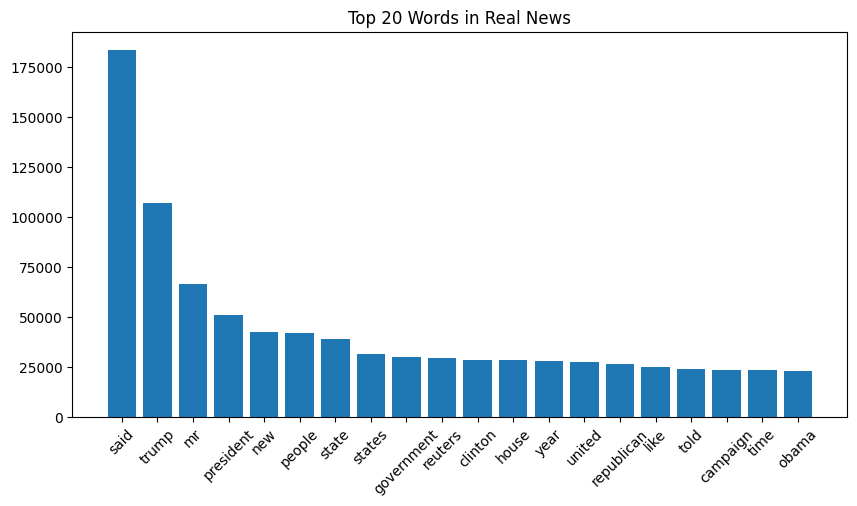

In [ ]:
fake_texts = df_cleaned[df_cleaned['label'] == 1]['text']
real_texts = df_cleaned[df_cleaned['label'] == 0]['text']

vectorizer = CountVectorizer(stop_words='english', max_features=500)

fake_matrix = vectorizer.fit_transform(fake_texts)
fake_freq = fake_matrix.sum(axis=0).A1
fake_words = vectorizer.get_feature_names_out()

fake_counts = pd.DataFrame({'word': fake_words, 'count': fake_freq}).sort_values(by='count', ascending=False)

real_matrix = vectorizer.fit_transform(real_texts)
real_freq = real_matrix.sum(axis=0).A1
real_words = vectorizer.get_feature_names_out()

real_counts = pd.DataFrame({'word': real_words, 'count': real_freq}).sort_values(by='count', ascending=False)

plt.figure(figsize=(10,5))
plt.bar(fake_counts['word'][:20], fake_counts['count'][:20])
plt.xticks(rotation=45)
plt.title("Top 20 Words in Fake News")
plt.show()

plt.figure(figsize=(10,5))
plt.bar(real_counts['word'][:20], real_counts['count'][:20])
plt.xticks(rotation=45)
plt.title("Top 20 Words in Real News")
plt.show()


The most frequently used words are similar in both factual and fake news articles. While the top-ranked words vary slightly depending on the article's factuality, the differences in their position are generally small.

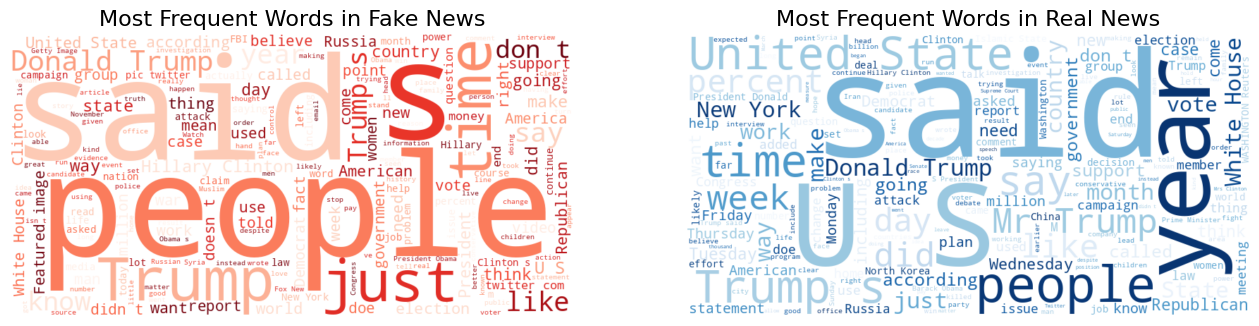

In [ ]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt

stopwords_sklearn = set(ENGLISH_STOP_WORDS)

fake_texts = " ".join(df_cleaned[df_cleaned['label'] == 1]['text'])
real_texts = " ".join(df_cleaned[df_cleaned['label'] == 0]['text'])

fake_wc = WordCloud(width=800, height=400, background_color="white",
                    stopwords=stopwords_sklearn, colormap="Reds").generate(fake_texts)

real_wc = WordCloud(width=800, height=400, background_color="white",
                    stopwords=stopwords_sklearn, colormap="Blues").generate(real_texts)

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.imshow(fake_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Fake News", fontsize=16)

plt.subplot(1,2,2)
plt.imshow(real_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Real News", fontsize=16)

plt.show()


In [ ]:
from textblob import TextBlob

label_mapping = {0: 'Factual News', 1: 'Fake News'}
df_cleaned['label'] = df_cleaned['label'].map(label_mapping)
df_cleaned['sentiment'] = df_cleaned['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
sentiment_stats = df_cleaned.groupby('label')['sentiment'].agg(
    count='count',
    mean='mean',
    std='std',
    min='min',
    p5=lambda x: x.quantile(0.05),
    median='median',
    p95=lambda x: x.quantile(0.95),
    max='max'
)


print(sentiment_stats)

              count      mean       std  min        p5    median       p95  \
label                                                                        
Factual News  34791  0.061850  0.087115 -0.9 -0.070000  0.062469  0.193028   
Fake News     28330  0.063886  0.116050 -1.0 -0.091168  0.059526  0.230167   

                 max  
label                 
Factual News  0.9375  
Fake News     1.0000  


When comparing the sentiment of factual and fake news, the average sentiment is quite similar, with both leaning slightly positive. However, fake news shows a considerably higher variability than factual news. This is easier to see when looking at the 5th and 95th percentiles, as well as the most negative and most positive articles.

In [ ]:
df_cleaned['readability'] = df_cleaned['text'].apply(lambda x: textstat.flesch_reading_ease(str(x)))
readability_stats = df_cleaned.groupby('label')['readability'].agg(
    count='count',
    mean='mean',
    std='std',
    min='min',
    p5=lambda x: x.quantile(0.05),
    median='median',
    p95=lambda x: x.quantile(0.95),
    max='max'
)

print(readability_stats)

              count       mean        std      min         p5     median  \
label                                                                      
Factual News  34791  46.058966  11.129009  -132.58  28.340744  45.971800   
Fake News     28330  49.241127  29.055639 -2078.38  25.754235  51.235349   

                    p95     max  
label                            
Factual News  64.213920  121.22  
Fake News     70.463171  121.22  


Analyzing the readability, there is a strong discrepancy between the quantile p5 and p95 which are not very far from the median and the min and max. This infomation suggest that there are a few outliers that over inflate the variability. It is important to check this outliers to know if they are the product of some mistakes treating the data.

In [ ]:
extremely_low = df_cleaned[df_cleaned['readability'] < -80]
print("Extremely low readability:")
print(extremely_low[['label', 'readability', 'text']].head(20))

Extremely low readability:
           label  readability  \
114    Fake News   -85.257881   
153    Fake News   -84.306258   
421    Fake News  -386.380000   
795    Fake News  -809.380000   
1899   Fake News  -301.780000   
2170   Fake News  -132.580000   
2531   Fake News  -301.780000   
3461   Fake News  -217.180000   
3480   Fake News   -85.216991   
4165   Fake News  -301.780000   
4555   Fake News  -132.580000   
5767   Fake News  -217.180000   
5907   Fake News   -85.335129   
6223   Fake News  -217.180000   
6561   Fake News  -520.378267   
6714   Fake News  -217.180000   
7458   Fake News  -140.192500   
8399   Fake News   -85.257301   
8909   Fake News  -724.780000   
10416  Fake News  -140.794286   

                                                    text  
114    Channel list \nFollowing hurricane Matthew's f...  
153    Afraid of "dangerous" Trump presidency, protes...  
421          https://www.youtube.com/watch?v=RRPSCqkAJgk  
795    https://fedup.wpengine.com/wp-conten

Looking at the first 20 articles with very complex text readability, the news with a readability score below -100 are not actually written articles. Instead, they are usually links to external websites or contain code.

In [ ]:
extremely_high = df_cleaned[df_cleaned['readability'] > 115]
print("\nExtremely high readability:")
print(extremely_high[['label', 'readability', 'text']].head(20))  # show first 10 examples


Extremely high readability:
              label  readability                          text
6271      Fake News      120.205                  Read more:WT
7193      Fake News      119.190                Read more: TMZ
7737      Fake News      120.205                   BRAVE GUY! 
8966      Fake News      121.220                        Watch:
10523     Fake News      121.220                       Watch: 
11065     Fake News      118.175                 I VE HAD IT! 
16322  Factual News      121.220                           No.
17017     Fake News      121.220                        Watch:
28432     Fake News      119.190                Wow! Just wow!
29745     Fake News      121.220                         Ouch!
33675     Fake News      117.160           This ad is spot on 
35160     Fake News      120.205               Guest   Guest  
37384     Fake News      120.205               Guest   Guest  
42192     Fake News      115.130  You won t want to miss this 
58102     Fake News      1

News articles with very basic writing can be understood, but they don’t form coherent sentences. They only start to make more meaningful sentences when their readability score approaches 115.

In [ ]:
df_cleaned= df_cleaned[
    (df_cleaned['readability'] >= -100) &
    (df_cleaned['readability'] <= 115)
].copy()

print("Remaining articles:", len(df_cleaned))

Remaining articles: 63042


Articles that don’t make sense due to being excessively simple or overly complex are removed from the working dataset.

In [ ]:
readability_stats_filtered = df_cleaned.groupby('label')['readability'].agg(
    count='count',
    mean='mean',
    std='std',
    min='min',
    p5=lambda x: x.quantile(0.05),
    median='median',
    p95=lambda x: x.quantile(0.95),
    max='max'
)

print(readability_stats_filtered)


              count       mean        std        min         p5     median  \
label                                                                        
Factual News  34788  46.066687  11.045455 -25.587500  28.342129  45.971961   
Fake News     28254  50.016229  15.596058 -86.223588  26.229437  51.261162   

                    p95      max  
label                             
Factual News  64.213422  103.625  
Fake News     70.373043  114.115  


After removing outliers, the standard deviation of fake news articles was reduced by half, though it still exceeds that of factual news. In general, fake news articles are more simplistic, but in the lower percentiles, their greater variability makes them more complex than factual ones.

In [ ]:
def tokenize_text(text):
    return word_tokenize(text)

df_cleaned['title_tokens'] = df_cleaned['title'].apply(tokenize_text)
df_cleaned['text_tokens'] = df_cleaned['text'].apply(tokenize_text)


In [ ]:
df_cleaned['title_token_length'] = df_cleaned['title_tokens'].apply(len)
df_cleaned['text_token_length'] = df_cleaned['text_tokens'].apply(len)

title_lengths = df_cleaned['title_token_length'].values
text_lengths = df_cleaned['text_token_length'].values

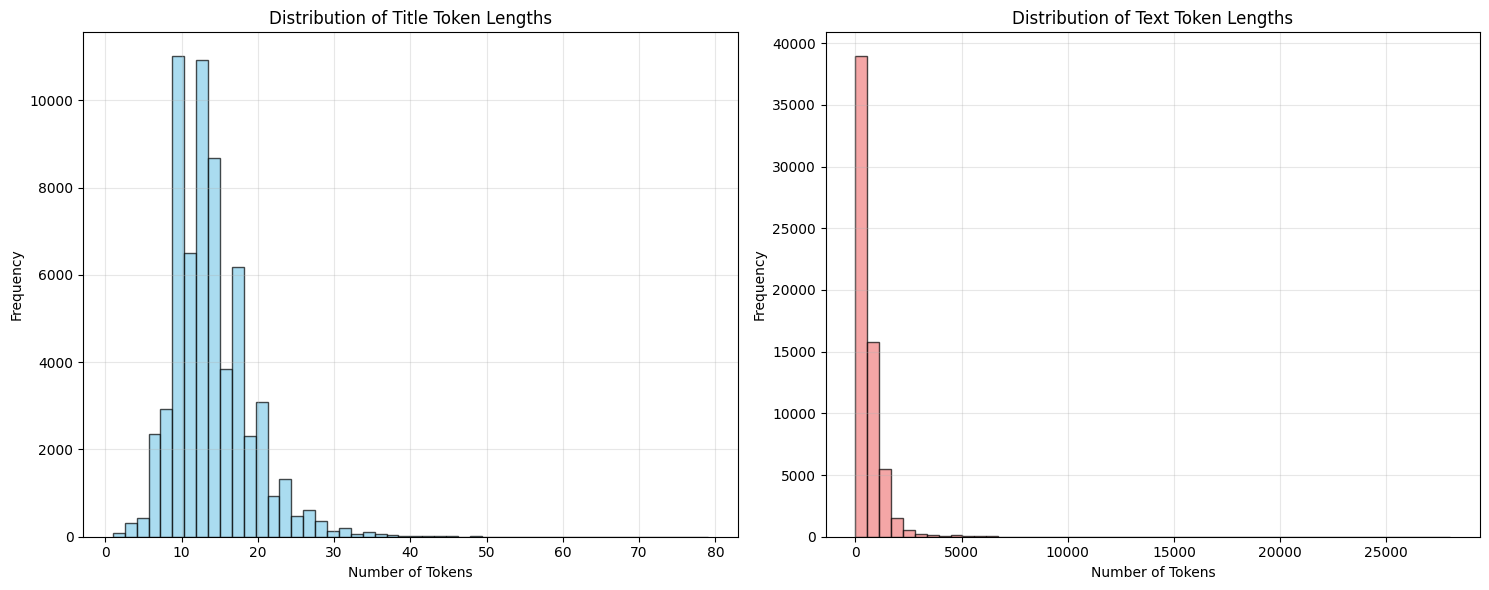

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.hist(title_lengths, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Distribution of Title Token Lengths')
ax1.set_xlabel('Number of Tokens')
ax1.set_ylabel('Frequency')
ax1.grid(True, alpha=0.3)

ax2.hist(text_lengths, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_title('Distribution of Text Token Lengths')
ax2.set_xlabel('Number of Tokens')
ax2.set_ylabel('Frequency')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

The distribution of token counts in the title variable resembles a normal curve: most articles have between 8 and 16 tokens, and the frequency gradually declines for shorter or longer titles.

The token counts in the text variable follow an exponential-like distribution. Most articles have fewer than 1,000 tokens, but a few have substantially more. A very small number of articles have extraordinarily high token counts, possibly due to errors. This does not affect the project, as all models only use a fixed number of the first words from each article to save computational resources.

/tmp/ipython-input-536191052.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['Factual News', 'Fake News'])
/tmp/ipython-input-536191052.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Factual News', 'Fake News'])


[Text(0, 0, 'Factual News'), Text(1, 0, 'Fake News')]

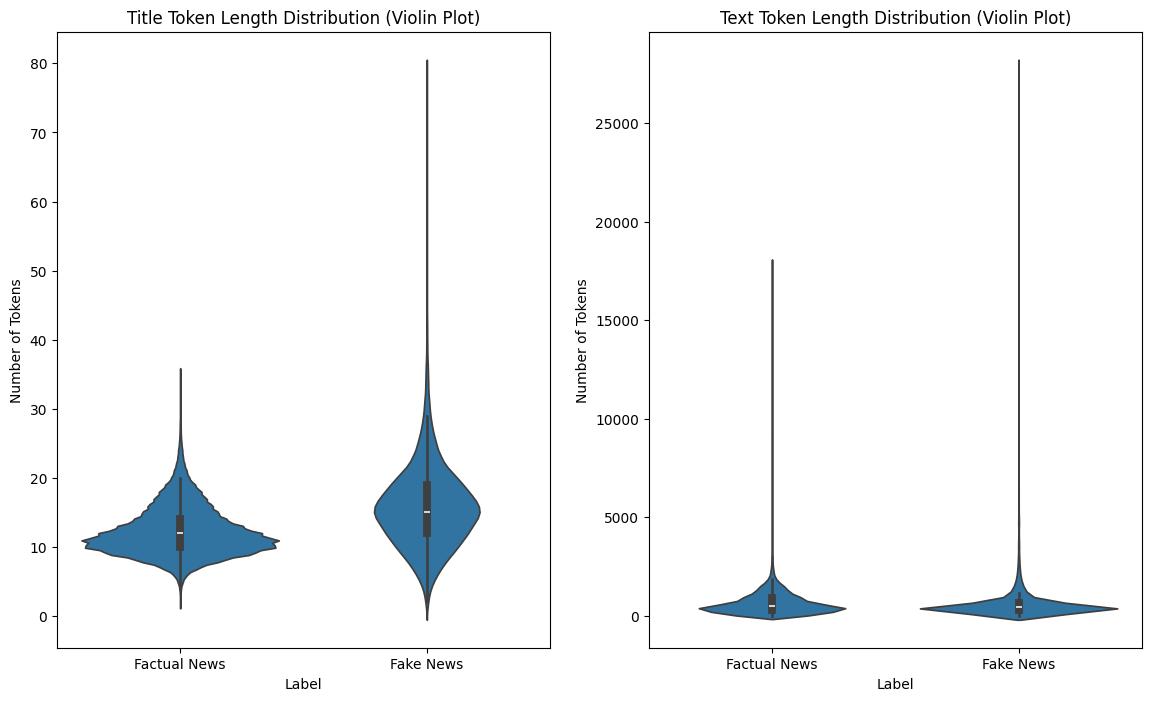

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))
sns.violinplot(x='label', y='title_token_length', data=df_cleaned, ax=ax1)
ax1.set_title('Title Token Length Distribution (Violin Plot)')
ax1.set_xlabel('Label')
ax1.set_ylabel('Number of Tokens')
ax1.set_xticklabels(['Factual News', 'Fake News'])


sns.violinplot(x='label', y='text_token_length', data=df_cleaned, ax=ax2)
ax2.set_title('Text Token Length Distribution (Violin Plot)')
ax2.set_xlabel('Label')
ax2.set_ylabel('Number of Tokens')
ax2.set_xticklabels(['Factual News', 'Fake News'])

The distribution on the number of tokens in the article is visually different depending on if they are factual or fake news article. This happens specially in the variable title. The violin plot show that in the factual news most articles have between 8 and 12 tokens, it stands out that there very few articles with less than 8 tokens but theres a significant proportion after 12 tokens decreasing manually. In the fake news, the token counts are higher and more spread out.
In the variable text the distribution at the first eye is similar, but in a deeper observation the factual news articles have a bigger proportion of articles with a higher quantity of tokens even though the articles with the most tokens are fake news articles.

In [ ]:
def avg_chars(tokens):
    return sum(len(w) for w in tokens) / len(tokens) if tokens else 0

df_cleaned["avg_chars_title"] = df_cleaned["title_tokens"].apply(avg_chars)

print(df_cleaned["avg_chars_title"])

print(df_cleaned["title_tokens"][0])

df_cleaned["avg_chars_text"] = df_cleaned['text_tokens'].apply(avg_chars)


0        5.136364
2        4.800000
3        5.000000
4        4.210526
5        4.714286
           ...   
72127    5.294118
72129    5.000000
72130    5.307692
72131    4.800000
72132    5.800000
Name: avg_chars_title, Length: 63042, dtype: float64
['LAW', 'ENFORCEMENT', 'ON', 'HIGH', 'ALERT', 'Following', 'Threats', 'Against', 'Cops', 'And', 'Whites', 'On', '9-11By', '#', 'BlackLivesMatter', 'And', '#', 'FYF911', 'Terrorists', '[', 'VIDEO', ']']


Due to the relative complexity of creating this variable, it will be checked to verify its correctness.

In [ ]:
token_list = ['LAW', 'ENFORCEMENT', 'ON', 'HIGH', 'ALERT', 'Following', 'Threats', 'Against', 'Cops', 'And', 'Whites', 'On', '9-11By', '#', 'BlackLivesMatter', 'And', '#', 'FYF911', 'Terrorists', '[', 'VIDEO', ']']

total_characters = sum(len(token) for token in token_list)
number_of_tokens = len(token_list)
mean_characters = total_characters / number_of_tokens

print(f"Mean characters per token: {mean_characters:.6f}")

Mean characters per token: 5.136364


The average of characters in each token is well-calculated

/tmp/ipython-input-1236540599.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['Factual News', 'Fake News'])
/tmp/ipython-input-1236540599.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Factual News', 'Fake News'])


[Text(0, 0, 'Factual News'), Text(1, 0, 'Fake News')]

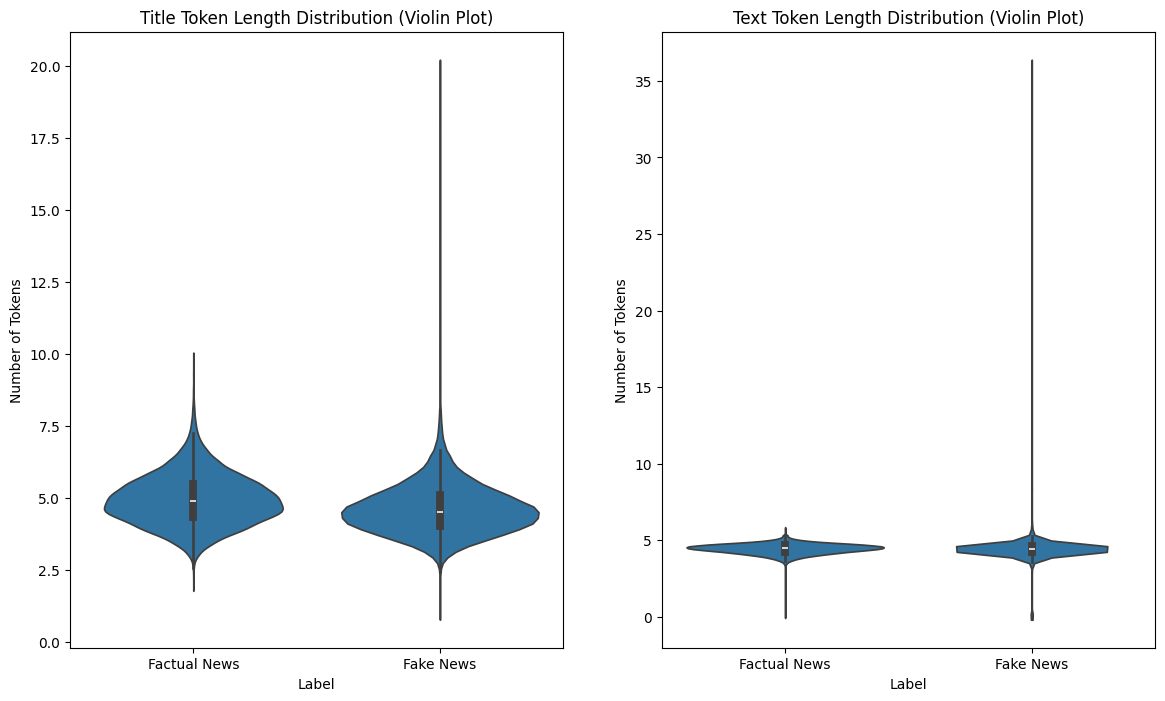

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))
sns.violinplot(x='label', y='avg_chars_title', data=df_cleaned, ax=ax1)
ax1.set_title('Title Token Length Distribution (Violin Plot)')
ax1.set_xlabel('Label')
ax1.set_ylabel('Number of Tokens')
ax1.set_xticklabels(['Factual News', 'Fake News'])

sns.violinplot(x='label', y='avg_chars_text', data=df_cleaned, ax=ax2)
ax2.set_title('Text Token Length Distribution (Violin Plot)')
ax2.set_xlabel('Label')
ax2.set_ylabel('Number of Tokens')
ax2.set_xticklabels(['Factual News', 'Fake News'])


The distribution of both types of news is fairly similar, especially in the title variable. Despite this similarity in overall shape, factual news articles tend to have a higher average token length in characters. However, the articles with the longest tokens, in either the title or text, are still fake news.

In [ ]:
print(df_cleaned)

       Unnamed: 0                                              title  \
0               0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2               2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3               3  Bobby Jindal, raised Hindu, uses story of Chri...   
4               4  SATAN 2: Russia unvelis an image of its terrif...   
5               5  About Time! Christian Group Sues Amazon and SP...   
...           ...                                                ...   
72127       72127  WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...   
72129       72129  Russians steal research on Trump in hack of U....   
72130       72130   WATCH: Giuliani Demands That Democrats Apolog...   
72131       72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132       72132  Trump tussle gives unpopular Mexican leader mu...   

                                                    text  label  sentiment  \
0      No comment is expected from Barack Obama Membe... 

In [ ]:
df_cleaned.to_pickle('df_cleaned.pkl')

In [3]:
df_cleaned = pd.read_pickle('df_cleaned.pkl')

After preprocessing and adding the new variables, the database is saved so it can be reused later without repeating the heavy computations.

In [ ]:
seed_value = 42
df_cleaned["combined_text"] = df_cleaned["title"] + " " + df_cleaned["text"]

dataset = Dataset.from_pandas(df_cleaned[['combined_text', 'label']])
dataset = dataset.train_test_split(test_size=0.2, seed=42)

model_name = "prajjwal1/bert-tiny"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize(batch):
    return tokenizer(batch["combined_text"],
                     padding="max_length",
                     truncation=True,
                     max_length=128)

dataset = dataset.map(tokenize, batched=True)
dataset = dataset.rename_column("label", "labels")
dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=50,
    report_to="none",
    fp16=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()

metrics = trainer.evaluate()
print(metrics)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Map:   0%|          | 0/50433 [00:00<?, ? examples/s]

Map:   0%|          | 0/12609 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-1256047494.py:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


model.safetensors:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.081500,0.080761,0.972639,0.966167,0.972853,0.969499
2,0.067200,0.068254,0.980649,0.972982,0.984031,0.978476
3,0.052600,0.070551,0.981759,0.974544,0.984918,0.979703
4,0.035000,0.065602,0.984456,0.980905,0.984386,0.982643
5,0.034100,0.068866,0.984138,0.979365,0.985273,0.982310


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument i

{'eval_loss': 0.06886592507362366, 'eval_accuracy': 0.9841383139027678, 'eval_precision': 0.9793650793650793, 'eval_recall': 0.9852732434350603, 'eval_f1': 0.9823102777286397, 'eval_runtime': 46.1346, 'eval_samples_per_second': 273.309, 'eval_steps_per_second': 8.562, 'epoch': 5.0}


In [ ]:
results_bert = pd.DataFrame({
    "Accuracy": [round(metrics["eval_accuracy"], 4)],
    "Precision": [round(metrics["eval_precision"], 4)],
    "Recall": [round(metrics["eval_recall"], 4)],
    "F1": [round(metrics["eval_f1"], 4)]
})
print(results_bert)

   Accuracy  Precision  Recall      F1
0    0.9841     0.9794  0.9853  0.9823


In [ ]:
torch.save(model, "bert.pt")

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


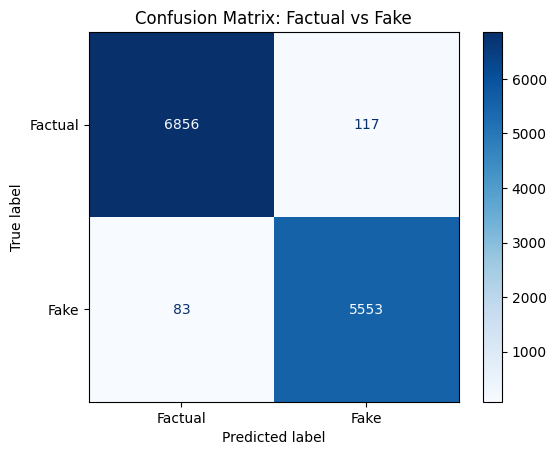

In [ ]:
predictions = trainer.predict(dataset["test"])
y_pred = np.argmax(predictions.predictions, axis=-1)
y_true = predictions.label_ids
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Factual', 'Fake'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix: Factual vs Fake')
plt.show()

The creation and training of the model took approximately one hour on a medium-spec CPU with moderate RAM. Despite the relatively short training time, the results are excellent, with almost all articles correctly classified. The BERT model, in particular, performs impressively and accurately identifying fake news. This capability is crucial for preventing the spread of misinformation.


In [5]:
texts = df_cleaned['text_tokens'].apply(lambda x: ' '.join(x))
titles = df_cleaned['title_tokens'].apply(lambda x: ' '.join(x))
labels = df_cleaned['label'].values

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 20000
max_len_text = 200
max_len_title = 30

tokenizer_text = Tokenizer(num_words=max_words)
tokenizer_text.fit_on_texts(texts)
seq_text = tokenizer_text.texts_to_sequences(texts)
padded_text = pad_sequences(seq_text, maxlen=max_len_text)

tokenizer_title = Tokenizer(num_words=max_words)
tokenizer_title.fit_on_texts(titles)
seq_title = tokenizer_title.texts_to_sequences(titles)
padded_title = pad_sequences(seq_title, maxlen=max_len_title)


In [ ]:
from sklearn.preprocessing import StandardScaler


from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model

embedding_dim = 100

text_input = Input(shape=(max_len_text,), name="text_input")
embedding_text = Embedding(input_dim=max_words,
                           output_dim=embedding_dim,
                           input_length=max_len_text)(text_input)
lstm_text = LSTM(128)(embedding_text)

title_input = Input(shape=(max_len_title,), name="title_input")
embedding_title = Embedding(input_dim=max_words,
                            output_dim=embedding_dim,
                            input_length=max_len_title)(title_input)
lstm_title = LSTM(64)(embedding_title)



merged = Concatenate()([lstm_text, lstm_title])
x = Dropout(0.5)(merged)
x = Dense(64, activation="relu")(x)
output = Dense(1, activation="sigmoid")(x)

model_not_numeric = Model(inputs=[text_input, title_input], outputs=output)
model_not_numeric.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model_not_numeric.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 200)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ title_input         │ (None, 30)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 200, 100)  │  2,000,000 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 30, 100)   │  2,000,000 │ title_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 128)       │    117,248 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 64)        │     42,240 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 192)       │          0 │ lstm[0][0],       │
│ (Concatenate)       │                   │            │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 192)       │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │     12,352 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │         65 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,171,905 (15.91 MB)

 Trainable params: 4,171,905 (15.91 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
seed_value = 42

evaluation= model_not_numeric.fit(
    {
        "text_input": padded_text,
        "title_input": padded_title
    },
    labels,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
789/789 ━━━━━━━━━━━━━━━━━━━━ 399s 499ms/step - accuracy: 0.9087 - loss: 0.2102 - val_accuracy: 0.9602 - val_loss: 0.0984
Epoch 2/5
789/789 ━━━━━━━━━━━━━━━━━━━━ 395s 500ms/step - accuracy: 0.9816 - loss: 0.0512 - val_accuracy: 0.9661 - val_loss: 0.0900
Epoch 3/5
789/789 ━━━━━━━━━━━━━━━━━━━━ 394s 500ms/step - accuracy: 0.9957 - loss: 0.0133 - val_accuracy: 0.9640 - val_loss: 0.1245
Epoch 4/5
789/789 ━━━━━━━━━━━━━━━━━━━━ 392s 497ms/step - accuracy: 0.9986 - loss: 0.0049 - val_accuracy: 0.9672 - val_loss: 0.1430
Epoch 5/5
789/789 ━━━━━━━━━━━━━━━━━━━━ 393s 498ms/step - accuracy: 0.9984 - loss: 0.0051 - val_accuracy: 0.9642 - val_loss: 0.1511


In [ ]:
model_not_numeric.save('my_model_with_no_numeric_variables.keras')

In [ ]:
from sklearn.model_selection import train_test_split

X_text = padded_text
X_title = padded_title

y = df_cleaned['label'].values

X_text_train, X_text_test, X_title_train, X_title_test, y_train, y_test = train_test_split(
    X_text, X_title, y, test_size=0.2, random_state=42
)

In [ ]:
X_test = [X_text_test, X_title_test]

import numpy as np

y_pred_prob = model_not_numeric.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary")

results_LSTM_no_numeric= pd.DataFrame({
    "Accuracy": [round(accuracy, 4)],
    "Precision": [round(precision, 4)],
    "Recall": [round(recall, 4)],
    "F1": [round(f1, 4)]
})
print(results_LSTM_no_numeric)



395/395 ━━━━━━━━━━━━━━━━━━━━ 86s 213ms/step
   Accuracy  Precision  Recall      F1
0    0.9916     0.9914    0.99  0.9907


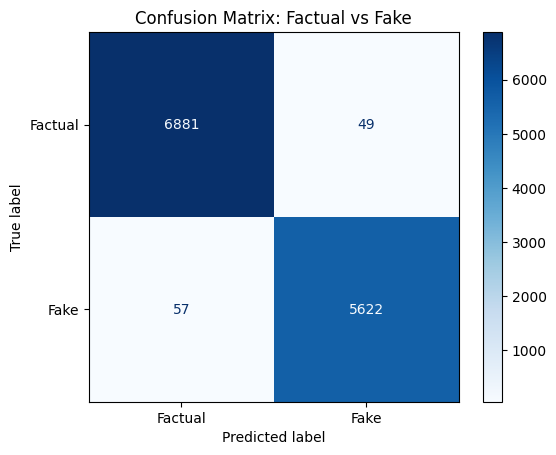

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Factual', 'Fake'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix: Factual vs Fake')
plt.show()

The Embedding + LSTM model delivers even better results. While the accuracy percentage may seem only marginally higher at first glance, the confusion matrix tells a different story: the number of misclassified articles has been cut in half. This means an organization implementing this model would experience 50% fewer misclassifications, effectively halving the problems compared to using the BERT model.

In [6]:
from sklearn.preprocessing import StandardScaler

numeric_features = df_cleaned[["sentiment","readability","title_token_length",'text_token_length', 'avg_chars_title', 'avg_chars_text']].values

scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)

from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model

embedding_dim = 100

text_input = Input(shape=(max_len_text,), name="text_input")
embedding_text = Embedding(input_dim=max_words,
                           output_dim=embedding_dim,
                           input_length=max_len_text)(text_input)
lstm_text = LSTM(128)(embedding_text)

title_input = Input(shape=(max_len_title,), name="title_input")
embedding_title = Embedding(input_dim=max_words,
                            output_dim=embedding_dim,
                            input_length=max_len_title)(title_input)
lstm_title = LSTM(64)(embedding_title)

numeric_input = Input(shape=(numeric_features_scaled.shape[1],), name="numeric_input")
dense_numeric = Dense(4096, activation="relu")(numeric_input)

merged = Concatenate()([lstm_text, lstm_title, dense_numeric])
x = Dropout(0.5)(merged)
x = Dense(64, activation="relu")(x)
output = Dense(1, activation="sigmoid")(x)   # binary classification

model = Model(inputs=[text_input, title_input, numeric_input], outputs=output)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 200)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ title_input         │ (None, 30)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 200, 100)  │  2,000,000 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 30, 100)   │  2,000,000 │ title_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric_input       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 128)       │    117,248 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 64)        │     42,240 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 4096)      │     28,672 │ numeric_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 4288)      │          0 │ lstm[0][0],       │
│ (Concatenate)       │                   │            │ lstm_1[0][0],     │
│                     │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 4288)      │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │    274,496 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,462,721 (17.02 MB)

 Trainable params: 4,462,721 (17.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
seed_value = 42

history_numeric= model.fit(
    {
        "text_input": padded_text,
        "title_input": padded_title,
        "numeric_input": numeric_features_scaled
    },
    labels,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/5
789/789 ━━━━━━━━━━━━━━━━━━━━ 443s 556ms/step - accuracy: 0.9093 - loss: 0.2085 - val_accuracy: 0.9649 - val_loss: 0.0932
Epoch 2/5
789/789 ━━━━━━━━━━━━━━━━━━━━ 424s 538ms/step - accuracy: 0.9791 - loss: 0.0555 - val_accuracy: 0.9632 - val_loss: 0.1022
Epoch 3/5
789/789 ━━━━━━━━━━━━━━━━━━━━ 410s 520ms/step - accuracy: 0.9933 - loss: 0.0216 - val_accuracy: 0.9641 - val_loss: 0.1238
Epoch 4/5
789/789 ━━━━━━━━━━━━━━━━━━━━ 414s 524ms/step - accuracy: 0.9960 - loss: 0.0122 - val_accuracy: 0.9644 - val_loss: 0.1634
Epoch 5/5
789/789 ━━━━━━━━━━━━━━━━━━━━ 412s 522ms/step - accuracy: 0.9981 - loss: 0.0056 - val_accuracy: 0.9666 - val_loss: 0.1515


In [ ]:
model.save('my_model_with_numeric_variables.keras')

In [4]:
from tensorflow.keras.models import load_model

model = load_model("my_model_with_numeric_variables.keras")

In [8]:
from sklearn.model_selection import train_test_split

X_text = padded_text
X_title = padded_title
X_numeric = numeric_features_scaled

y = df_cleaned['label'].values

X_text_train, X_text_test, X_title_train, X_title_test, X_numeric_train, X_numeric_test, y_train, y_test = train_test_split(
    X_text, X_title, X_numeric, y, test_size=0.2, random_state=42
)


In [ ]:
X_test = [X_text_test, X_title_test, X_numeric_test]
import numpy as np

y_pred_prob = model.predict(X_test)  # probabilities
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # class labels 0/1
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary")

results_LSTM_numeric= pd.DataFrame({
    "Accuracy": [round(accuracy, 4)],
    "Precision": [round(precision, 4)],
    "Recall": [round(recall, 4)],
    "F1": [round(f1, 4)]
})
print(results_LSTM_numeric)


395/395 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step
   Accuracy  Precision  Recall      F1
0    0.9925     0.9909  0.9924  0.9916


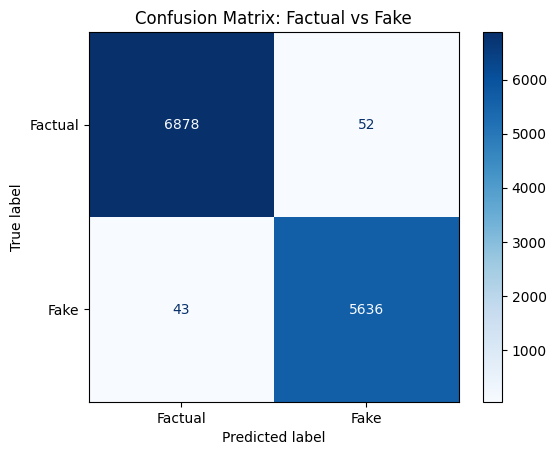

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Factual', 'Fake'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix: Factual vs Fake')
plt.show()


By incorporating numeric variables, the model achieves higher accuracy in detecting fake news, resulting in fewer fake articles being misclassified as factual. This improvement is particularly valuable for preventing the spread of misinformation. Furthermore, the training time remains nearly identical to that of the model without numeric variables. However, the accuracy in identifying factual articles correctly remains similar to the previous model.

# Conclusion

On the whole, the results of all the models created despite a low computational time are excellent a very small percentatge of the news are missclassified. The accuracy of the models suggests that they are good enough to apply them in a website and organization, without the constant supervision of a person. It would need only an evaluation from time to time to know that the models are working accordangly and implementing a system to report fake news for the users.

Comparing the models, it is preferable for a low time creating model the LSTM + embedding models because they give less than half the missclassification as the BERT model. It is important to mention again that this is for models that require low time training, if larger models would have been used the results might be different. Furthermore the numeric variable that have been obtained throught analyzing features of the variables text and title have improve detecting correcty fake news.

The model with the best results in the LSTM + embedding model with numeric features, demonstrating that with this dataset the creation of this variables in worth it.

For future studies, it would be valuable to examine whether this level of accuracy remains consistent with a larger dataset, and to identify which numerical variables contribute most to improving the model's performance.

